In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns                                                          
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, log_loss 
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler                              
from sklearn.svm import SVC                                                   
from sklearn.preprocessing import Normalizer                                   
from sklearn.linear_model import LogisticRegression                            
from sklearn.naive_bayes import GaussianNB                                    
from sklearn.ensemble import RandomForestClassifier                            

In [12]:
df = pd.read_csv(r'F:\PHD\heart.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


C:\Users\mm388\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='target', ylabel='count'>

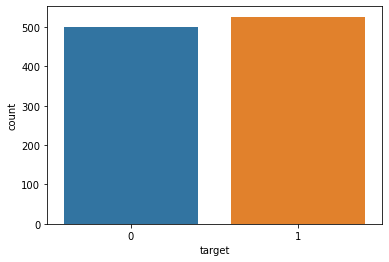

In [14]:
sns.countplot(df['target'])

<AxesSubplot:xlabel='sex', ylabel='count'>

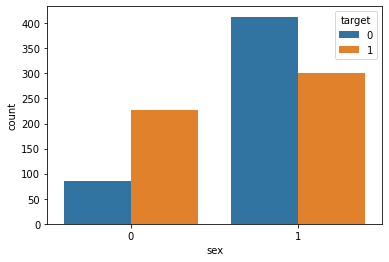

In [15]:
sns.countplot(data = df, x = 'sex', hue = 'target')

<AxesSubplot:>

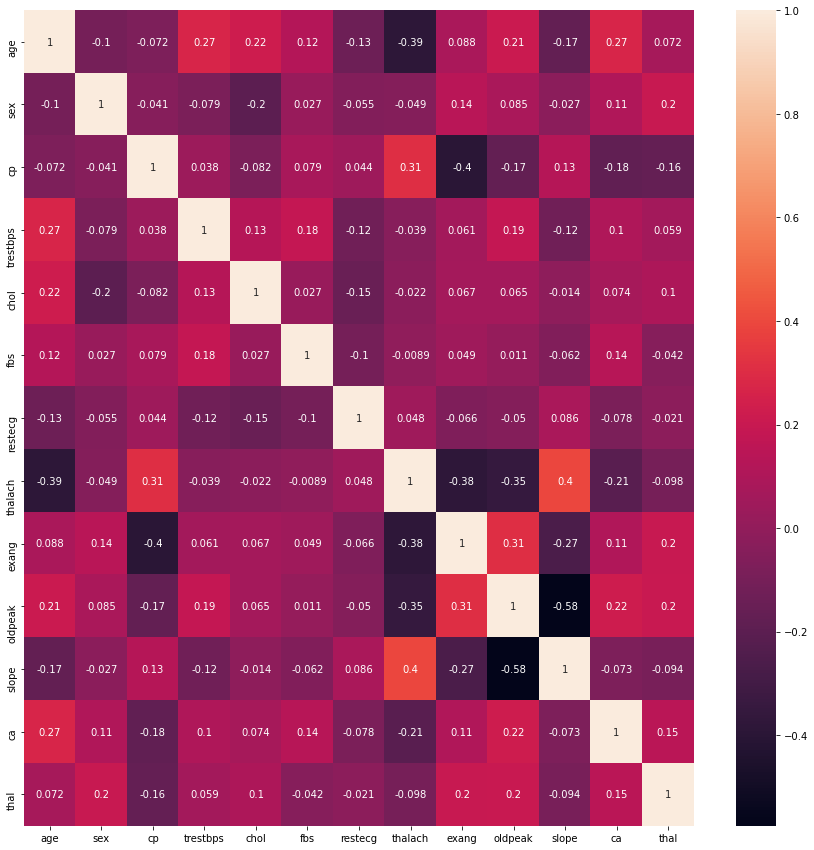

In [16]:
plt.figure(figsize = (15, 15))
sns.heatmap(df.drop(['target'], axis = 1).corr(), annot = True)

<AxesSubplot:xlabel='age', ylabel='thalach'>

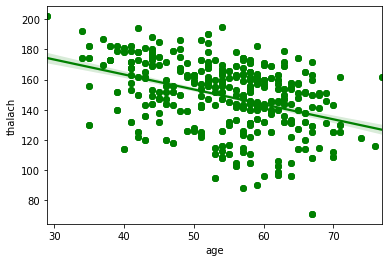

In [17]:
sns.regplot(x = 'age', y ='thalach', data = df, color = 'green')

In [18]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


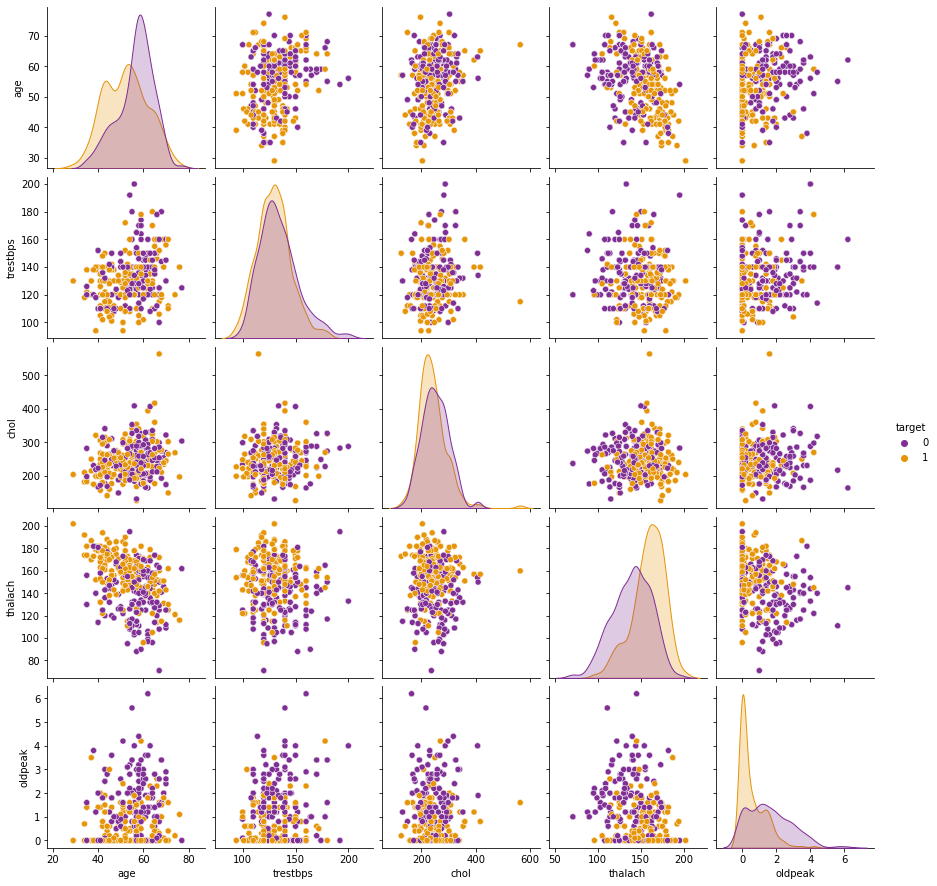

In [19]:
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'target']], hue = 'target', palette = 'CMRmap')

<AxesSubplot:xlabel='age', ylabel='chol'>

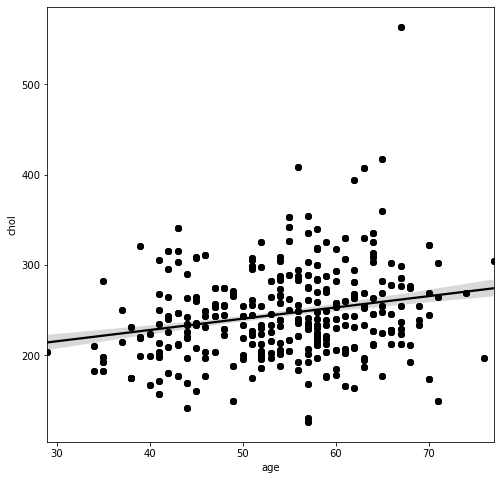

In [20]:
plt.figure(figsize = (8, 8))
sns.regplot(data = df, x = 'age', y = 'chol', color = 'black')

In [21]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


<AxesSubplot:xlabel='chol'>

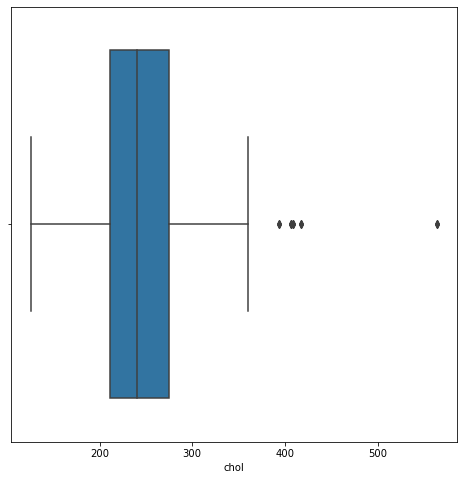

In [22]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'chol')

<AxesSubplot:xlabel='thalach'>

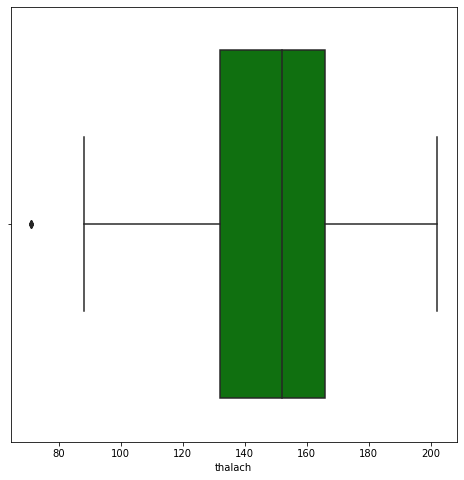

In [23]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, x = 'thalach', color = 'green')

<AxesSubplot:ylabel='age'>

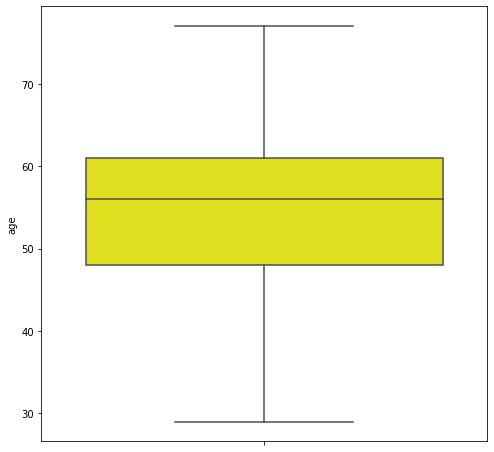

In [24]:
plt.figure(figsize = (8, 8))
sns.boxplot(data = df, y = 'age', color = 'yellow')

In [25]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [26]:
X = df.drop(['target'], axis = 1)
y = df['target']

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)


In [28]:
X_train.shape 

(717, 13)

In [29]:
X_test.shape 

(308, 13)

Creating Empty Lists

We are creating an empty list of all the values that would be needed for plotting the barplots and comparing results. For each machine learning algorithm, we would store the output values in lists so that it would be easier later for us to do all sorts of plotting operations.

In [30]:
accuracy_scaled = []            
f1_score_scaled = []
precision_score_scaled = []
recall_score_scaled = []
roc_auc_score_scaled = []
log_loss_scaled = []

accuracy_normalized = []
f1_score_normalized = []
precision_score_normalized = []
recall_score_normalized = []
roc_auc_score_normalized = []
log_loss_normalized = []

Standarization and Normalization

One of the most important operations that we must perform before we give the complete dataset to the machine learning model would be either to scale the features or normalize them so that we would not run into errors in the process. Therefore, we would be transforming the features and converting them so that it would be easier for the machine learning models to perform the machine learning operations and give us the right outputs and improve the overall performance of the model.


In [31]:
scaler = StandardScaler()                              #Creating an instance of the StandardScaler()                    
scaler.fit(X_train)                                    #Fitting the input train values 
X_train_scaled = scaler.transform(X_train)             #Transforming the values and storing in X_train_scaled
X_test_scaled = scaler.transform(X_test)  

In [32]:
normalizer = Normalizer()                              #Creating an instance of the Normalizer()
normalizer.fit(X_train)                                #Fitting the input train values
X_train_normalized = normalizer.transform(X_train)     #Transforming the values and storing in X_train_normalized
X_test_normalized = normalizer.transform(X_test)

K Nearest Neighbors (KNN)

Since we have understood the data and did some operations and divided the dataset, it is now time to move to the most important part of the application which is to use machine learning algorithms for prediction. We would be using the K nearest neighbors algorithm for prediction. It is very important to understand the theory behind machine learning so that we do the hyperparameter tuning later rather than just using random values in the dataset.

One of the hyperparameter in k nearest neighbor is the number of nearest neighbors. We have selected the value to be equal to 3 as can be seen from the cell below.

What we need to do before we use the machine learning algorithm is to create an instance of it and then, we have to fit the training data values and then use predict which is later used after this cell.

We have 2 types of data that we must be considering right now. The first type of data is the standardized data where the input values are standardized. On the other hand, there is some other type of data where the input features are normalized. We have to consider those values and get the predictions seperately so that we could compare at last which one was the right step for a particular machine learning model.

In [33]:
neigh1 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instance of KNeighborsClassifier()
neigh1.fit(X_train_scaled, y_train)                     #Fitting the model with X_train_scaled and y_train 
neigh2 = KNeighborsClassifier(n_neighbors = 3)          #Creating an instace of KNeighborsClassifier()
neigh2.fit(X_train_normalized, y_train) 

KNeighborsClassifier(n_neighbors=3)

In [34]:
y_test_predict_scaled = neigh1.predict(X_test_scaled)                   #Getting the predicted output of the fit models
y_test_predict_normalized = neigh2.predict(X_test_normalized)

Appending data to lists

We would append the values just like we did in the previous cells to the lists that we have created before. We would continuously append these values as they would be needed later for visualization.

In [35]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))              #Appending the results with lists 
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

Random Forest Classifier

We would be using one more machine learning algorithm called random forest classifier. This machine learning model has a few hyperparameters that must be tuned in order to get the most accurate result. I just found out that the best values that we would be using right would be the max_depth which is assigned the value 10 and random state which we would be giving the value to be 100. We would do the same thing where we first fit the model and then, we use the predict which will help us get the predictions.

In [36]:
clf1 = LogisticRegression(random_state = 100)
clf2 = LogisticRegression(random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

Appending data to lists

We would append the values of the random forest results metrics just as we did for the previous models. We would store the values in the lists that we have created before and use them later for data visualizations.

In [37]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

Naive Bayes Model

The other model that we would be considering is the gaussian naive bayes machine learning model. This is one of the most useful models for machine learning. We do the processs just like the we did before. We would first fit the training dataset to the machine learning model and then, we would make some predictions so that we would be get the best output in the near future.

In [38]:
clf1 = GaussianNB()
clf2 = GaussianNB()
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

Appending data to lists

We would append the values just like we did in the previous cells to the lists that we have created before. We would continuously append these values as they would be needed later for visualization.

In [39]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

Random Forest Classifier

We would be using one more machine learning algorithm called random forest classifier. This machine learning model has a few hyperparameters that must be tuned in order to get the most accurate result. I just found out that the best values that we would be using right would be the max_depth which is assigned the value 10 and random state which we would be giving the value to be 100. We would do the same thing where we first fit the model and then, we use the predict which will help us get the predictions.

In [40]:
clf1 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf2 = RandomForestClassifier(max_depth = 10, random_state = 100)
clf1.fit(X_train_scaled, y_train)
clf2.fit(X_train_normalized, y_train)
y_test_predict_scaled = clf1.predict(X_test_scaled)
y_test_predict_normalized = clf2.predict(X_test_normalized)

Appending data to lists

We would append the values of the random forest results metrics just as we did for the previous models. We would store the values in the lists that we have created before and use them later for data visualizations.

In [41]:
accuracy_scaled.append(accuracy_score(y_test_predict_scaled, y_test))
f1_score_scaled.append(f1_score(y_test_predict_scaled, y_test))
precision_score_scaled.append(precision_score(y_test_predict_scaled, y_test))
recall_score_scaled.append(recall_score(y_test_predict_scaled, y_test))
roc_auc_score_scaled.append(roc_auc_score(y_test_predict_scaled, y_test))
log_loss_scaled.append(log_loss(y_test_predict_scaled, y_test))

accuracy_normalized.append(accuracy_score(y_test_predict_normalized, y_test))
f1_score_normalized.append(f1_score(y_test_predict_normalized, y_test))
precision_score_normalized.append(precision_score(y_test_predict_normalized, y_test))
recall_score_normalized.append(recall_score(y_test_predict_normalized, y_test))
roc_auc_score_normalized.append(roc_auc_score(y_test_predict_normalized, y_test))
log_loss_normalized.append(log_loss(y_test_predict_normalized, y_test))

Barplot for metrics with standardized features

Now comes the time for the visualization that we have been waiting for after appending the values to the lists that we have created. Here, we see that there are 5 models that we have used for the predictions. We have loaded the required metrics in the lists that were created above. One thing to keep in mind is that the output of the metrics would be in the range of 0-1.
For the sake of simplicity, I multiplied those values with 100 so that the difference in the values is more apparent and could be easily spotted in the graphs that are shown below. Therefore, the y axis would be more like a percentage rather than values ranging between 0-1. We are using the barplots so that the comparison between metrics would be easily understood and interpretable. We also have legend which shows the different metrics that we have considered for the machine learning models. I have also increased the fontsize just to ensure that the results are very clear along with axis and the title.
Let us now talk about the barplot that we see below. This is a barplot for the output of the machine learning models when the input values are standardized. We might get a different result for the output if the input values that we are giving to the machine learning models are normalized. Now we see from the graph that logistic regression, naive bayes and random forest classifier are the most accurate models in terms of how the model did on the test set. One thing to keep in mind, though, is that when we consider just the accuracy, there might be a possibility of machine learning model not performing well yet though it has a high accuracy.

ROC score is one of the useful metric for the machine learning models. Therefore, we see that Naive Bayes has a good ROC value followed by logistic regression. For the most part, out of all the values in the dataset, we see that the Naive Bayes model did the best in terms of all the metrics. That is still open to debate as we do not know what is the most important metric for the classification problem that we are solving at this point. I believe that f1 score is best when considering the robustness of the machine learning model in many machine learning applications. F1 score would actually take into consideration both the recall and the precision of the models under comparison when doing the machine learning operations. In our different machine learning models, therefore, we find that the f1 score for naive bayes model is the best. Thus, it would be good to use the naive bayes model for the prediction of chances of heart disease in a patient.

Text(0.5, 1.0, 'Final scaled output results for machine learning models')

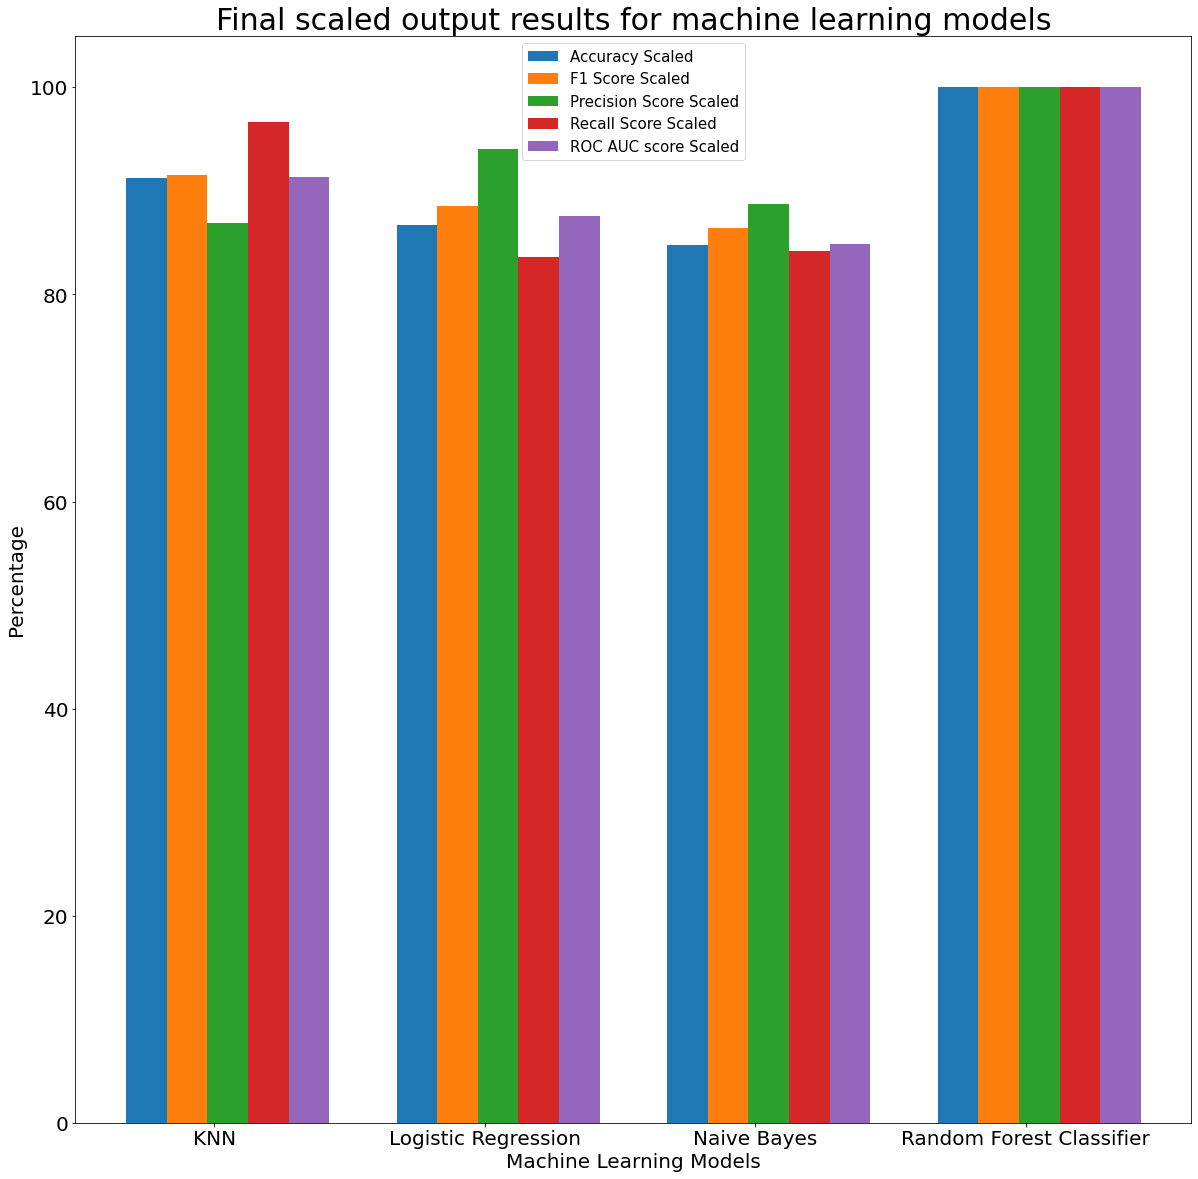

In [42]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (20, 20))           #Increasing the size of the figure so that it is clear 
plt.yticks(fontsize = 20)                #Increasing the fontsize of the y axis just to make it clear
#getting a barplot between models and accurcy_scaled list and multiplying those with 100 to make it clear in graph
plt.bar(models, [i * 100 for i in accuracy_scaled], width = 0.15) 
#Performing the same operations for other lists so that we would draw them later 
plt.bar(models + 0.15, [i * 100 for i in f1_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_scaled], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_scaled], width = 0.15)
plt.legend(['Accuracy Scaled', 'F1 Score Scaled', 'Precision Score Scaled', 'Recall Score Scaled', 'ROC AUC score Scaled'], fontsize = 15)
plt.xticks([i + 0.25 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20) #Creating a label for the x-axis 
plt.ylabel('Percentage', fontsize = 20)  #Creating a label for the y-axis 
plt.title('Final scaled output results for machine learning models', fontsize = 30) #Adding a title with modified font size 

Barplot for metrics with normalized features

We would also do the same visualization for the normalized input that we have generated previously. We would compare the results for this normalized input and plot the important machine learning metrics in the form of a bargraph.
One of the things that strike out when we consider the plot below is that logistic regression has a very high precision score.
What this means is that when we consider the precision, it means out of all the points that were predicted to be positive, how many values are actually positive. In our problem, we see that out of all the patients who were classified as having a heart disease, what percentage of them were rightly classified. Using logistic regression, we found the precision is about 95 percent. It turns out that the model did very well in precision and it would be a useful indicator to test whether the patient has a heart disease with a precision of about 95 percent.

In general, the naive bayes machine learning model did really well in terms of the output metrics that we have considered. KNN model did not perform well as compared to the other models. Therefore, normalized values given to the KNN algorithm in our problem did not work well and it would not be wise to give a very large dataset to this machine learning model as it was not able to perform well on the small dataset. If the models perform well on a dataset that is small, it would be reasonable to assume that those models might have a upper hand when the number of data points we consider is very large or that are close the to real world datasets.

Text(0.5, 1.0, 'Final normalized results for machine learning models')

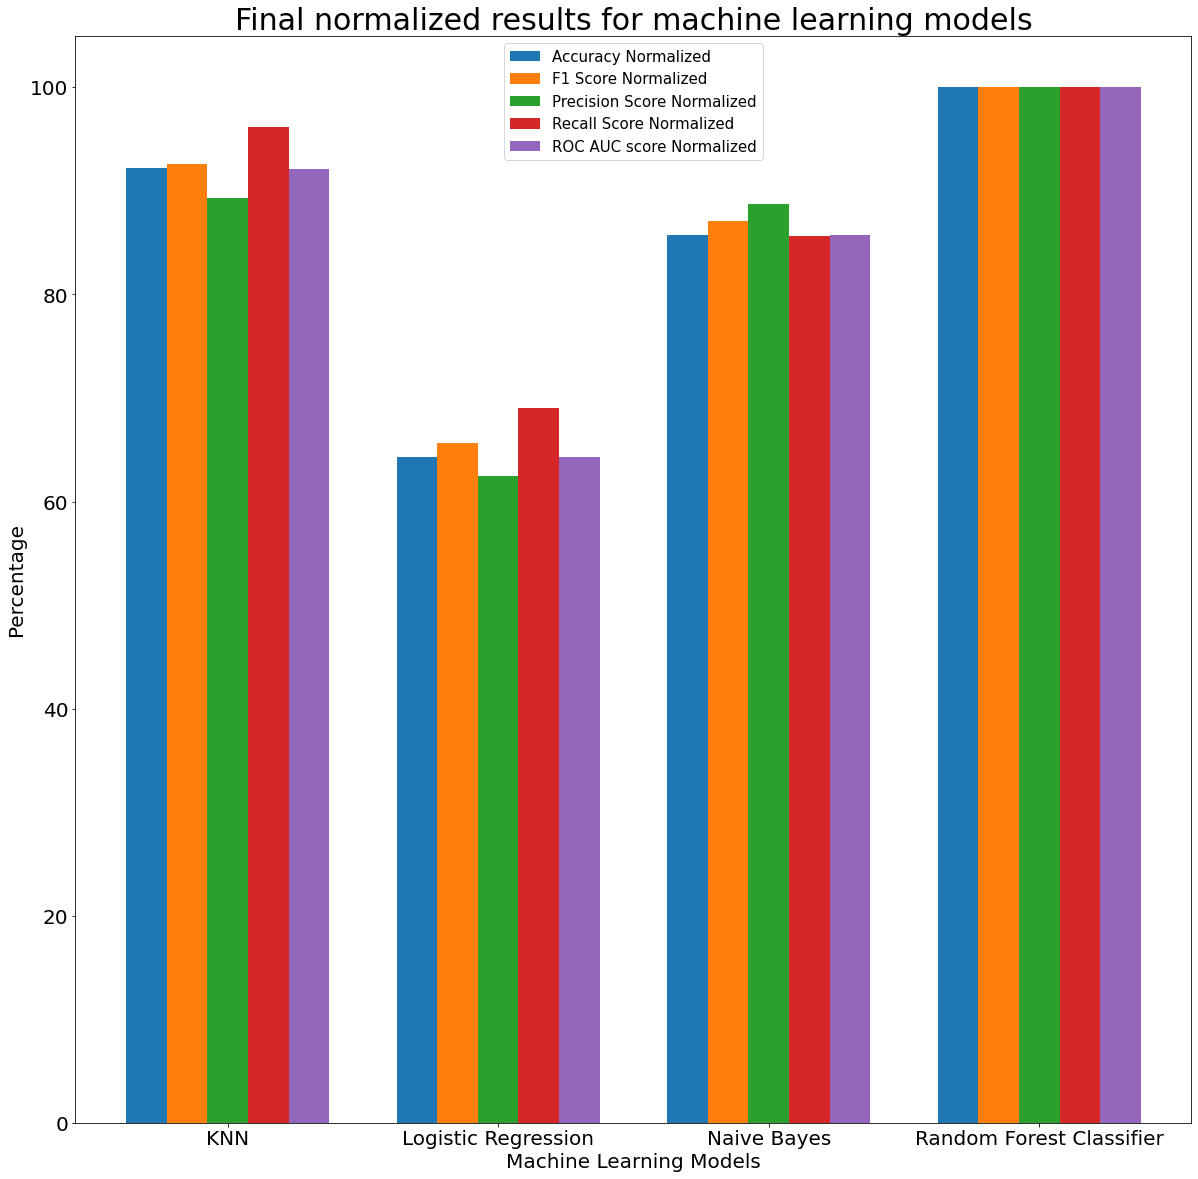

In [43]:
# knn, logisticregression, naivebayes, randomforestclassifier model values are plotted 
models = ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier']
models = np.arange(len(models))
plt.figure(figsize = (20, 20))
plt.yticks(fontsize = 20)
plt.bar(models, [i * 100 for i in accuracy_normalized], width = 0.15)
plt.bar(models + 0.15, [i * 100 for i in f1_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 2, [i * 100 for i in precision_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 3, [i * 100 for i in recall_score_normalized], width = 0.15)
plt.bar(models + 0.15 * 4, [i * 100 for i in roc_auc_score_normalized], width = 0.15)
plt.legend(['Accuracy Normalized', 'F1 Score Normalized', 'Precision Score Normalized', 'Recall Score Normalized', 'ROC AUC score Normalized'], fontsize = 15)
plt.xticks([i + 0.3 for i in range(4)], ['KNN', 'Logistic Regression', 'Naive Bayes', 'Random Forest Classifier'], fontsize = 20)
plt.xlabel('Machine Learning Models', fontsize = 20)
plt.ylabel('Percentage', fontsize = 20)
plt.title("Final normalized results for machine learning models", fontsize = 30)